In [1]:
import glob

In [2]:
glob.glob('/home/ross/Dropbox/benchmark/FlickrMaterials/image/*')

['/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/water',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/fabric',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/stone',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/paper',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/glass',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/wood',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/leather',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/foliage',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/metal']

In [3]:
import os

In [4]:
walked = [w for w in os.walk('/home/ross/Dropbox/benchmark/FlickrMaterials/image')]

In [5]:
from itertools import accumulate

In [6]:
class_paths = glob.glob('/home/ross/Dropbox/benchmark/FlickrMaterials/image/*')

In [7]:
class_paths

['/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/water',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/fabric',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/stone',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/paper',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/glass',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/wood',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/leather',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/foliage',
 '/home/ross/Dropbox/benchmark/FlickrMaterials/image/metal']

In [8]:
[glob.glob(cpath+'/*') for cpath in class_paths]

[['/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate_009_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate_026_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_object_047_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_object_005_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate_012_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate_029_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_object_029_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate_008_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_object_049_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate_007_new.jpg',
  '/home/ross/Dropbox/benchmark/FlickrMaterials/image/plastic/plastic_moderate

In [9]:
num_classes = 10

In [10]:
import matplotlib.pyplot as plt
import numpy as np

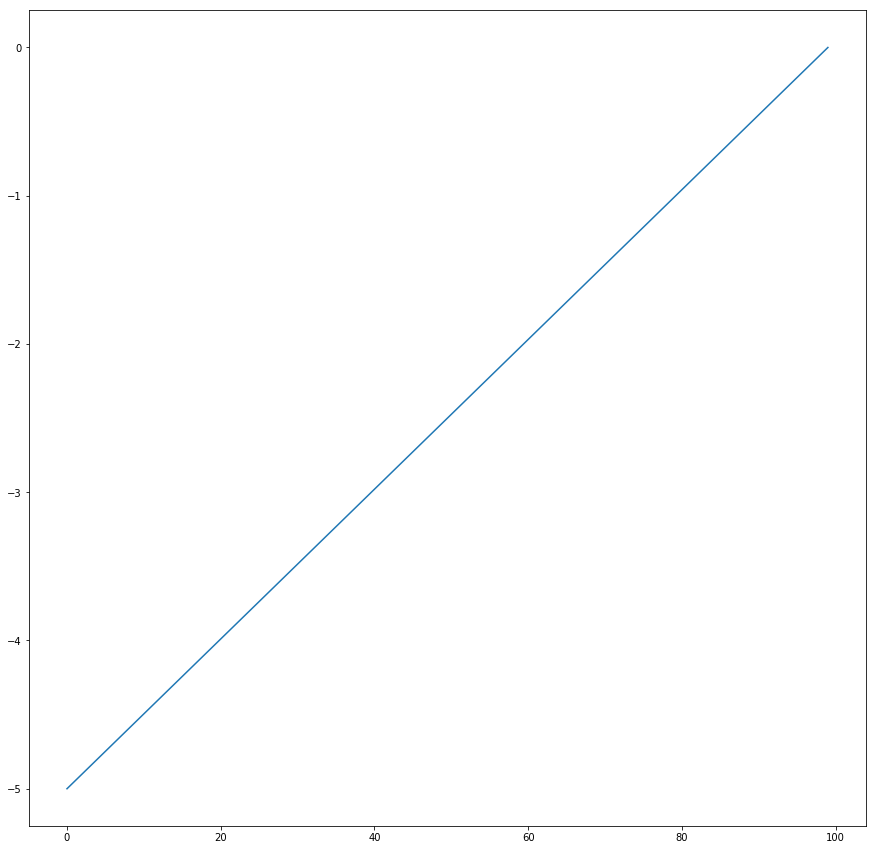

In [11]:
epochs = 100
low = -5
high = -1
plt.figure(figsize=(15,15))
plt.plot(np.arange(epochs), np.linspace(-5, 0, num=epochs))

In [20]:
from texture.datasets import DTDDataset, DatasetSequence
from imgaug import augmenters as iaa

In [13]:
dtd = DTDDataset('/home/ross/Dropbox/benchmark/dtd')
dtd.load_or_generate_data()

/home/ross/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


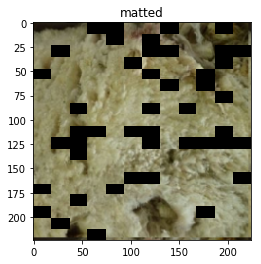

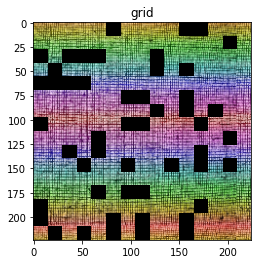

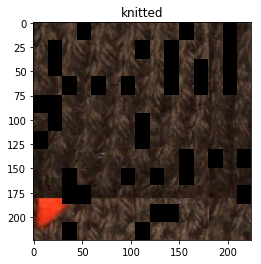

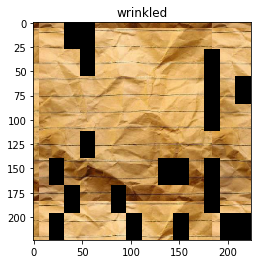

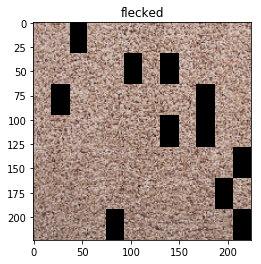

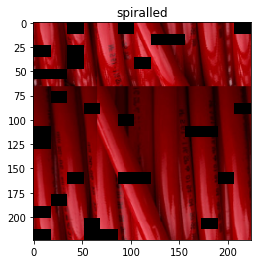

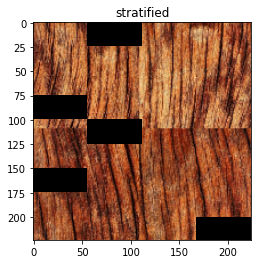

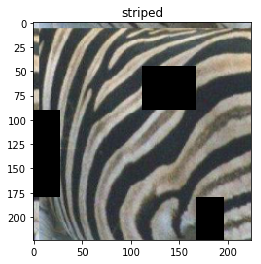

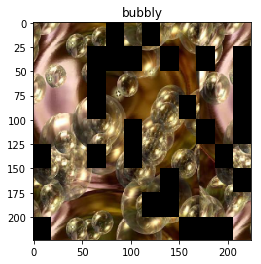

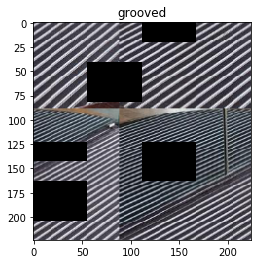

In [44]:
aug_seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(scale=(0.75, 1.25),
               translate_percent=(-1., 1.),
               mode='wrap'),
    #iaa.Sharpen(alpha=(0.0,0.25), lightness=(0.9, 1.1)),
    #aa.Invert(0.5)
    iaa.CoarseDropout((0.1, 0.25), size_percent=(0.01, 0.1))
])

def train_batch_aug(batch_X, batch_y):
    return aug_seq.augment_images(batch_X), batch_y

gen = DatasetSequence(dtd.X_train, dtd.y_train, 10, augment_fn=train_batch_aug)
gen.on_epoch_end() # to shuffle

X_sample, y_sample = gen.__getitem__(np.random.randint(0, 100))

for img, y in zip(X_sample, y_sample):
    plt.title(dtd.classes[np.argmax(y)])
    plt.imshow(img)
    plt.show()

In [45]:
X_sample.shape

(10, 224, 224, 3)

In [47]:
X_sample.mean(axis=(0,1,2))

array([0.43250925, 0.32798766, 0.26642407])

In [54]:
X_sample.max()

1.0

In [51]:
dtd.X_train.max()

1.0

In [52]:
test = X_sample - X_sample.mean((0,1,2))
test.mean((0,1,2))

array([ 1.45196635e-13, -1.00349762e-13, -6.16172734e-14])

In [53]:
test.shape

(10, 224, 224, 3)